# Principal Component Analysis

Principal Component Analysis (PCA) is an unsupervised learning algorithm used in the field of data analysis and machine learning. Its primary purpose is to **reduce the dimensionality of a data set**, while retaining as much of the variability (or information) in the data as possible:

1. **Dimensionality Reduction**: Often, datasets have many variables, some of which are correlated. PCA helps to reduce the number of variables by finding **new**, fewer variables that still capture the essential information. These new variables are called principal components.
2. **Principal Components**: Each principal component is a linear combination of the original variables. The first principal component accounts for the largest possible variability in the data, the second principal component (which is uncorrelated with the first) accounts for the next highest variability, and so on.
3. **Visualization and Analysis**: PCA is often used to simplify data for visualization purposes, especially when dealing with high-dimensional data. By reducing dimensions to two or three principal components, it’s possible to plot and visually inspect the data more easily.
4. **Noise Reduction**: PCA can also help in filtering out noise from the dataset by focusing only on the components with the most variance.
5. **Pre-processing for Machine Learning**: In machine learning, PCA is used as a pre-processing step to speed up algorithms, as less dimensional data takes less computational resources to process.
6. **Interpretation**: It's important to note that while PCA reduces dimensions and can make models more efficient and easier to work with, the principal components themselves can sometimes be difficult to interpret in the context of the original data.

PCA is a widely used technique in areas like exploratory data analysis, pattern recognition, image processing, and many others, due to its effectiveness in simplifying complex datasets.

In [228]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [229]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [230]:
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [231]:
# we'll do PCA because we can't visualise anything in a 30-dimension chart
df = pd.DataFrame(cancer["data"], columns=cancer["feature_names"])
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


## Scale features

In [232]:
# scale data so that each feature has a single unit variance (instead of values such as 0.16 and 1326)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)  # features
scaler.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [233]:
scaled_data = scaler.transform(df)

In [234]:
# All features are now scaled
pd.DataFrame(scaled_data).head(3)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391


## PCA

In [235]:
"""
1) Instiantiate a PCA object
2) Find the principal components with the fit method
3) Apply the rotation and dimensionality reduction with transform
"""

from sklearn.decomposition import PCA

# 1) `n_components`: number of components we want to keep
pca = PCA(n_components=2)


In [236]:
"""
2) Calculate the two principal components that capture the maximum variance in the data.
The scaling of the data before applying PCA is crucial as PCA is sensitive to the scale of the data.
"""
pca.fit(scaled_data)
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 2,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [237]:
"""
3) Apply the dimensionality reduction learned by pca.fit. It transforms the scaled data to the new
coordinate system defined by the first two principal components. The result, x_pca, is an array
with the same number of rows as scaled_data but only two columns, corresponding to the two principal
components.
"""
x_pca = pca.transform(scaled_data)

# 30 features x 569 rows
print(f' {scaled_data.shape} -> scaled_data')

# 2 features x 569 rows
print(f' {x_pca.shape}  -> x_pca')

 (569, 30) -> scaled_data
 (569, 2)  -> x_pca


Text(0, 0.5, '2nd Principal Component')

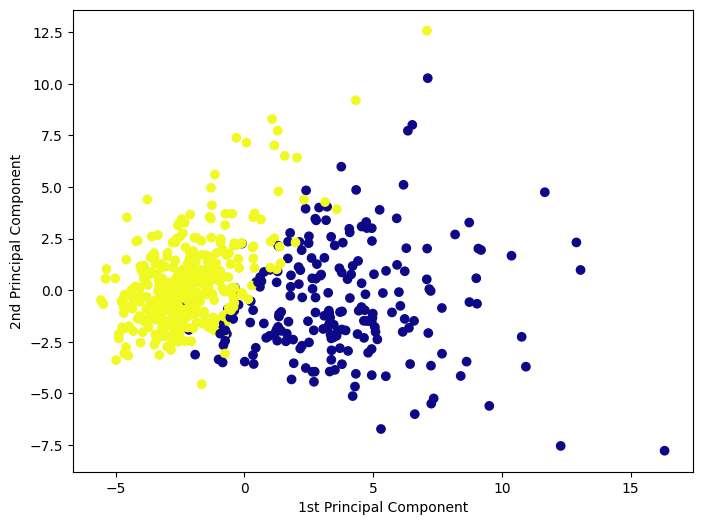

In [238]:
# Now we can plot out data with the 2 new dimensions
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cancer["target"], cmap="plasma")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")

In [239]:
# Principal components do not relate 1:1 to features from the dataset
# indeed, components correspond to combinations of the original features

# - each row is a principal component
# - each column relates back to each original features
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

## Interpreting Results

In [240]:
# show relationship between components and each of the features
df_comp = pd.DataFrame(pca.components_, columns=cancer["feature_names"])
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<Axes: >

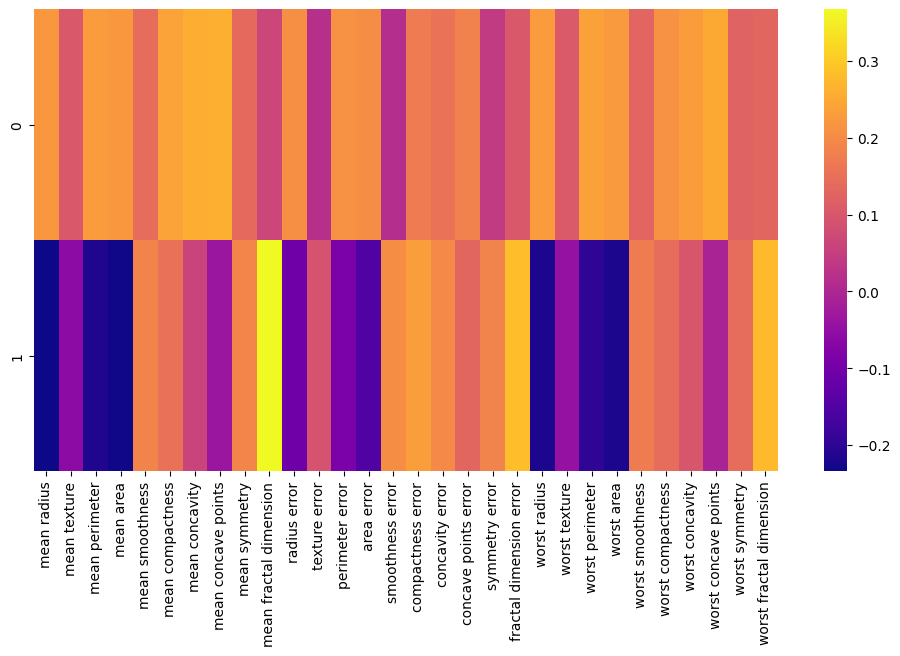

In [241]:
# show correlation between each feature and the principal components in a heatmap
# -> the higher the value (yellowish), the more correlation with the feature
plt.figure(figsize=(12, 6))
sns.heatmap(data=df_comp, cmap="plasma")

## Logistic Regression over Principal Components

In [242]:
# next: do a logistic regression based on x_pca instead of the entire df. (use SVM)
df_pca = pd.DataFrame(x_pca)
df_pca["target"] = cancer["target"]
df_pca.head(3)

,0,1,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0


In [243]:
from sklearn.model_selection import train_test_split

X = df_pca.drop("target", axis=1)
y = df_pca["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

In [244]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)
logmodel.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [245]:
from sklearn.metrics import classification_report

predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        66
           1       0.97      0.95      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



## Predict a new case

In [251]:
new_data = [[14, 13, 88, 566, 1, 2, 3, 4, 0.1, 0.2, 0.3, 0.05, 0.01, 25, 5, 3, 0.15, 0.04, 0.05, 0.02, 14, 25, 90, 600, 0.15, 0.3, 0.4, 0.1, 0.2, 0.05]]
new_sample = pd.DataFrame(new_data, columns=cancer["feature_names"])
scaled_new_sample = scaler.transform(new_sample)
pca_new_sample = pca.transform(scaled_new_sample)
prediction = logmodel.predict(pca_new_sample)

print("Predicted Class:", "Malignant" if prediction[0] == 1 else "Benign")


Predicted Class: Malignant
